In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6393/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/review_set.csv')

In [3]:
data

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment,tokenized_text,cbow_100,cbow_200,cbow_300,skip_100,skip_200,skip_300
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer beware item resold amazons warehouse arr...,negative,"['buyer', 'beware', 'item', 'resold', 'amazons...",[-0.39362407 -0.4405561 0.7578464 -0.462111...,[ 7.71771789e-01 -2.92405903e-01 -9.50897574e-...,[-0.16938438 0.24625634 -0.46419868 -0.882425...,[ 0.06454789 0.18846889 -0.05970062 -0.171933...,[ 0.2066745 -0.06999359 -0.22351597 -0.043630...,[ 8.96185450e-03 1.98712707e-01 -1.78583771e-...
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buy multiplayer constantly crashes beat ...,negative,"['worth', 'buy', 'multiplayer', 'constantly', ...",[-0.07988553 0.62484217 0.92543775 0.386560...,[ 0.47697964 -0.42041346 -0.28281224 0.317279...,[-3.92227501e-01 -8.24878365e-02 -2.23724723e-...,[-0.0464965 0.19994405 0.12396079 -0.079265...,[ 8.08507428e-02 -9.33995396e-02 -4.72498313e-...,[-0.04857423 0.18954967 -0.11027914 0.101788...
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,he fine its going anything amazing quality wis...,positive,"['he', 'fine', 'its', 'going', 'anything', 'am...",[ 0.5938122 -0.04918326 0.706827 -0.037756...,[ 0.54668874 -0.48038602 -0.82715124 0.465129...,[ 0.14933151 0.07357039 0.29167452 -0.052706...,[-0.0265629 0.13160017 0.13413723 -0.034839...,[ 0.16482434 -0.08151112 -0.19320697 0.174967...,[ 0.0458313 0.11134648 0.01559512 0.029723...
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant be anyone claiming unhappy remake must h...,positive,"['meant', 'be', 'anyone', 'claiming', 'unhappy...",[-0.06578858 0.1392136 0.7796086 0.30397 ...,[ 1.49350300e-01 -7.14472681e-02 -3.94015163e-...,[-0.04525001 -0.10637057 0.20614931 -0.132059...,[-0.03567467 0.0629238 0.1268603 0.085942...,[ 5.19071110e-02 5.50758839e-03 -6.07071146e-...,[ 1.12580862e-02 1.41405344e-01 -4.45027277e-...
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good it like mouse feels moves bat...,negative,"['looks', 'feels', 'good', 'it', 'like', 'mous...",[-4.7121191e-01 -3.6917660e-01 8.7431790e-03 ...,[ 0.3986053 -0.6056684 0.12251271 0.883424...,[-2.33329743e-01 -3.31666738e-01 -3.20470259e-...,[-0.12920853 -0.05629515 -0.11374266 -0.179993...,[ 1.56011581e-01 -6.21234104e-02 -1.50771579e-...,[-1.90687310e-02 1.93801254e-01 -1.24733604e-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101377,5,B002BS4JDS,B002BWOW54,AEKBIKIR7PT4TYLW3ET2LQVXWBVQ,2013-02-13 15:11:03.000,0,True,holy addictive my family love game lego games ...,positive,"['holy', 'addictive', 'my', 'family', 'love', ...",[ 0.16999361 -0.00891593 0.4578732 0.095141...,[ 0.29331794 -0.19615303 0.23485555 0.679652...,[-2.39906386e-01 -2.80814826e-01 4.30720180e-...,[-0.0074003 0.06968607 0.0859542 0.033238...,[ 6.67690933e-02 5.03203683e-02 3.43778171e-...,[-0.00123571 0.10120233 0.05233141 0.096811...
101378,5,B00MTWV0II,B07JVMRDGK,AHHO73ZECCEN7VDURFRRP2F6NSPQ,2015-03-14 00:45:52.000,0,True,fun functional love keyboard color combination...,positive,"['fun', 'functional', 'love', 'keyboard', 'col...",[ 0.10731017 -1.4782801 0.18514511 -0.533410...,[ 5.72357416e-01 -3.49931479e-01 4.24307853e-...,[-0.05440084 -0.29460332 -0.13108167 -0.115697...,[ 0.06739293 -0.15754215 -0.05581499 -0.070090...,[ 0.13327672 -0.00516162 0.0384947 0.190205...,[ 7.51335546e-02 1.29089102e-01 -3.91742438e-...
101379,4,B00B67ZTUW,B00MOR1A7Y,AGYZWDLVOGYUAUFUQALN6DRXOUWA,2014-01-03 20:49:07.000,0,True,good stopgap rigid give of stars could decent ...,positive,"['good', 'stopgap', 'rigid', 'give', 'of', 'st...",[-0.0897091 0.18899031 0.8119985 0.230936...,[ 0.39389685 -0.16337158 -0.35992643 0.499263...,[-3.86408828e-02 -2.50519246e-01 6.07863814e-...,[-0.013814

In [4]:
data.columns

Index(['rating', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'review', 'sentiment', 'tokenized_text',
       'cbow_100', 'cbow_200', 'cbow_300', 'skip_100', 'skip_200', 'skip_300'],
      dtype='object')

<Axes: xlabel='rating'>

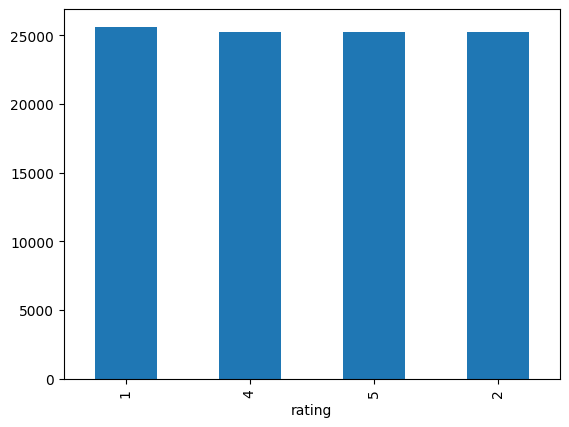

In [5]:
data.rating.value_counts().plot(kind='bar')

In [6]:
from gensim.models import Word2Vec

In [7]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [8]:
data['tokenized_text'] = data['review'].astype(str).apply(word_tokenize)


In [9]:
# Train a Word2Vec model
model = Word2Vec(data['tokenized_text'], min_count=1, sg=0)

# Function to transform text into the average of its word vectors
def text_to_vec(words, model):
    vec = [model.wv[word] for word in words if word in model.wv]
    return sum(vec) / len(vec) if vec else []

# Apply the function to the DataFrame column
data['cbow_100'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [10]:
model = Word2Vec(data['tokenized_text'], min_count=1, sg=0, vector_size=200)
data['cbow_200'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [11]:
model = Word2Vec(data['tokenized_text'], min_count=1, sg=0, vector_size=300)
data['cbow_300'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [12]:
model = Word2Vec(data['tokenized_text'], min_count=1, sg=1, vector_size=100)
data['skip_100'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [13]:
model = Word2Vec(data['tokenized_text'], min_count=1, sg=1, vector_size=200)
data['skip_200'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [14]:
model = Word2Vec(data['tokenized_text'], min_count=1, sg=1, vector_size=300)
data['skip_300'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [15]:
data

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment,tokenized_text,cbow_100,cbow_200,cbow_300,skip_100,skip_200,skip_300
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer beware item resold amazons warehouse arr...,negative,"[buyer, beware, item, resold, amazons, warehou...","[0.545317, -0.21564977, 0.51568645, 0.38870767...","[0.2384855, -0.34260374, -0.41333216, -0.59836...","[0.006405196, 0.43028155, -0.51863307, -0.9300...","[0.038187567, 0.18665566, 0.23664904, 0.084920...","[0.18109319, -0.021509606, -0.14841764, -0.081...","[0.04287673, 0.14920168, -0.08288265, -0.13030..."
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buy multiplayer constantly crashes beat ...,negative,"[worth, buy, multiplayer, constantly, crashes,...","[-0.37671033, 0.6851749, 0.048233546, 0.534387...","[0.6873738, -0.088952996, -0.30711484, 0.17878...","[-0.50919104, 0.16194093, -0.24606805, -0.1792...","[-0.16356048, 0.16475667, 0.001497522, 0.05987...","[0.21823806, 0.11707302, -0.17817183, 0.141382...","[0.02445365, 0.1298346, -0.006295112, 0.098295..."
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,he fine its going anything amazing quality wis...,positive,"[he, fine, its, going, anything, amazing, qual...","[-0.17917494, 0.24813238, -0.43781105, -0.3335...","[0.12651023, -0.22704233, -0.38603592, -0.0312...","[0.15064904, 0.030784702, 0.26371258, -0.47579...","[-0.064520955, 0.13714501, -0.00013779722, -0....","[0.10700023, -0.04703378, -0.07480646, 0.02726...","[0.09149052, 0.17171398, 0.06076982, -0.006529..."
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant be anyone claiming unhappy remake must h...,positive,"[meant, be, anyone, claiming, unhappy, remake,...","[0.3958075, 0.3082193, -0.15888186, -0.0695112...","[0.15442017, -0.00020592213, -0.007213199, -0....","[-0.104891814, 0.19099875, 0.08992682, -0.2230...","[0.12014632, 0.1967621, -0.012414491, -0.00437...","[0.11054812, -0.14009659, -0.10379422, 0.06227...","[-0.013449492, 0.1773664, 0.1552404, 0.0588310..."
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good it like mouse feels moves bat...,negative,"[looks, feels, good, it, like, mouse, feels, m...","[-0.6743909, 0.45099387, -0.65514565, -0.67172...","[-0.09625796, -0.14472322, -0.48217496, 0.1658...","[0.067484505, 0.099044256, 0.032496706, 0.3350...","[-0.14968501, 0.29299212, -0.094492115, 0.0097...","[-0.014529562, -0.019758472, -0.14008723, 0.13...","[0.07085883, 0.17279209, 0.07796377, 0.1886815..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101377,5,B002BS4JDS,B002BWOW54,AEKBIKIR7PT4TYLW3ET2LQVXWBVQ,2013-02-13 15:11:03.000,0,True,holy addictive my family love game lego games ...,positive,"[holy, addictive, my, family, love, game, lego...","[0.07456681, -0.21420552, -0.68902856, 0.29547...","[0.518542, 0.35111746, 0.058993068, 0.28495204...","[-0.17017624, -0.09551085, 0.5282624, 0.073276...","[-0.0009523321, 0.020163719, -0.03440173, 0.06...","[0.10062842, 0.023461835, -0.0011769511, 0.128...","[0.02563168, 0.12826411, 0.1033251, 0.12703171..."
101378,5,B00MTWV0II,B07JVMRDGK,AHHO73ZECCEN7VDURFRRP2F6NSPQ,2015-03-14 00:45:52.000,0,True,fun functional love keyboard color combination...,positive,"[fun, functional, love, keyboard, color, combi...","[0.1897979, -0.28225452, -0.79416466, -0.73488...","[-0.18050042, 0.05167529, -0.29480305, -0.1311...","[0.3761962, -0.10595754, 0.12602453, -0.242441...","[-0.045054313, 0.06309265, -0.07693119, -0.075...","[-0.0190554, 0.03260448, -0.052273117, 0.00675...","[0.113333136, 0.1356247, 0.12780124, 0.0631386..."
101379,4,B00B67ZTUW,B00MOR1A7Y,AGYZWDLVOGYUAUFUQALN6DRXOUWA,2014-01-03 20:49:07.000,0,True,good stopgap rigid give of stars could decent ...,positive,"[good, stopgap, rigid, give, of, stars, could,.

In [16]:
from gensim.models import FastText

In [17]:
model = FastText(data['tokenized_text'], min_count=1, vector_size=100)
data['fast_100'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [18]:
model = FastText(data['tokenized_text'], min_count=1, vector_size=200)
data['fast_200'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [19]:
model = FastText(data['tokenized_text'], min_count=1, vector_size=300)
data['fast_300'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [20]:
data

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment,tokenized_text,cbow_100,cbow_200,cbow_300,skip_100,skip_200,skip_300,fast_100,fast_200,fast_300
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer beware item resold amazons warehouse arr...,negative,"[buyer, beware, item, resold, amazons, warehou...","[0.545317, -0.21564977, 0.51568645, 0.38870767...","[0.2384855, -0.34260374, -0.41333216, -0.59836...","[0.006405196, 0.43028155, -0.51863307, -0.9300...","[0.038187567, 0.18665566, 0.23664904, 0.084920...","[0.18109319, -0.021509606, -0.14841764, -0.081...","[0.04287673, 0.14920168, -0.08288265, -0.13030...","[0.9530572, 0.3960484, 1.7462394, -0.28650162,...","[0.020165477, 0.11610061, -0.3493747, -0.55939...","[-0.5965491, -0.15313627, 0.017147193, -0.6991..."
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buy multiplayer constantly crashes beat ...,negative,"[worth, buy, multiplayer, constantly, crashes,...","[-0.37671033, 0.6851749, 0.048233546, 0.534387...","[0.6873738, -0.088952996, -0.30711484, 0.17878...","[-0.50919104, 0.16194093, -0.24606805, -0.1792...","[-0.16356048, 0.16475667, 0.001497522, 0.05987...","[0.21823806, 0.11707302, -0.17817183, 0.141382...","[0.02445365, 0.1298346, -0.006295112, 0.098295...","[0.85087585, 1.0301781, 0.6748274, 0.56125814,...","[0.5281244, -0.2433585, 0.33759138, -0.2270084...","[-0.4736105, 0.37792537, -0.39529952, 0.381423..."
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,he fine its going anything amazing quality wis...,positive,"[he, fine, its, going, anything, amazing, qual...","[-0.17917494, 0.24813238, -0.43781105, -0.3335...","[0.12651023, -0.22704233, -0.38603592, -0.0312...","[0.15064904, 0.030784702, 0.26371258, -0.47579...","[-0.064520955, 0.13714501, -0.00013779722, -0....","[0.10700023, -0.04703378, -0.07480646, 0.02726...","[0.09149052, 0.17171398, 0.06076982, -0.006529...","[1.2350699, -0.29386955, -0.79317373, -0.05802...","[0.30457014, -0.28825155, 0.5845775, -0.112821...","[0.14983556, 0.20702825, 0.3155291, -0.7893196..."
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant be anyone claiming unhappy remake must h...,positive,"[meant, be, anyone, claiming, unhappy, remake,...","[0.3958075, 0.3082193, -0.15888186, -0.0695112...","[0.15442017, -0.00020592213, -0.007213199, -0....","[-0.104891814, 0.19099875, 0.08992682, -0.2230...","[0.12014632, 0.1967621, -0.012414491, -0.00437...","[0.11054812, -0.14009659, -0.10379422, 0.06227...","[-0.013449492, 0.1773664, 0.1552404, 0.0588310...","[0.334683, -0.2627028, 0.34208494, 0.28831807,...","[-0.21063116, 0.07353077, 0.50831234, -0.31514...","[-0.48330227, -0.62325776, 0.29283643, -0.2671..."
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good it like mouse feels moves bat...,negative,"[looks, feels, good, it, like, mouse, feels, m...","[-0.6743909, 0.45099387, -0.65514565, -0.67172...","[-0.09625796, -0.14472322, -0.48217496, 0.1658...","[0.067484505, 0.099044256, 0.032496706, 0.3350...","[-0.14968501, 0.29299212, -0.094492115, 0.0097...","[-0.014529562, -0.019758472, -0.14008723, 0.13...","[0.07085883, 0.17279209, 0.07796377, 0.1886815...","[-0.18852532, -0.5280829, 0.7059163, 0.2828603...","[-0.9404778, 0.06803373, 0.6293846, -0.6839314...","[-0.043217324, -0.52685606, 0.5806683, -0.5738..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101377,5,B002BS4JDS,B002BWOW54,AEKBIKIR7PT4TYLW3ET2LQVXWBVQ,2013-02-13 15:11:03.000,0,True,holy addictive my family love game lego games ...,positive,"[holy, addictive, my, family, love, game, lego...","[0.07456681, -0.21420552, -0.68902856, 0.29547...","[0.518542, 0.35111746, 0.058993068, 0.28495204...","[-0.17017624, -0.09551085, 0.5282624, 0.073276...","[-0.0009523321, 0.020163719, -0.03440173, 0.06..

Let us plot a cosine similarity between different vectors to see how they are related.

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

First let's plot it for the first rows

In [40]:
data.cbow_100[:10]

0    [0.545317, -0.21564977, 0.51568645, 0.38870767...
1    [-0.37671033, 0.6851749, 0.048233546, 0.534387...
2    [-0.17917494, 0.24813238, -0.43781105, -0.3335...
3    [0.3958075, 0.3082193, -0.15888186, -0.0695112...
4    [-0.6743909, 0.45099387, -0.65514565, -0.67172...
5    [-0.2347964, 0.32028538, 0.20319842, 0.2132156...
6    [0.11340185, 0.09683357, 0.014950097, 0.707552...
7    [-0.17006508, 0.29152012, -0.7064719, -0.34331...
8    [0.4700375, -1.1228787, -1.1998255, -0.4630656...
9    [-0.24184535, 0.062905066, -0.50379735, -0.515...
Name: cbow_100, dtype: object

In [41]:
data.skip_100[:10]

0    [0.038187567, 0.18665566, 0.23664904, 0.084920...
1    [-0.16356048, 0.16475667, 0.001497522, 0.05987...
2    [-0.064520955, 0.13714501, -0.00013779722, -0....
3    [0.12014632, 0.1967621, -0.012414491, -0.00437...
4    [-0.14968501, 0.29299212, -0.094492115, 0.0097...
5    [-0.13451132, 0.14194152, 0.032236055, 0.03600...
6    [0.087853536, 0.17655446, 0.090964325, 0.19712...
7    [-0.0813958, 0.21124874, -0.09377133, -0.06035...
8    [0.08137058, -0.17860465, -0.014495668, -0.126...
9    [-0.042800605, 0.10710006, -0.13544826, 0.0201...
Name: skip_100, dtype: object

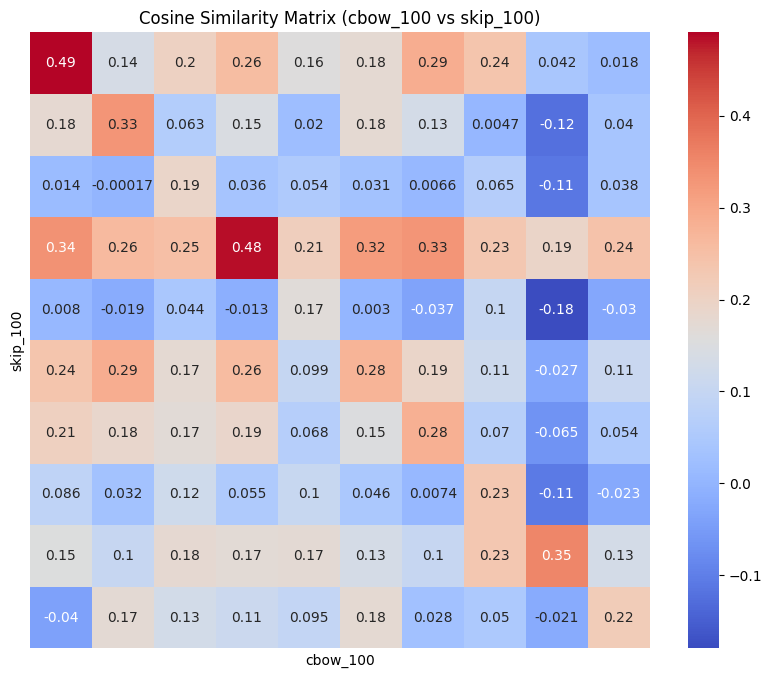

In [44]:
cos_sim_matrix = cosine_similarity(data['cbow_100'][:10].tolist(), data['skip_100'][:10].tolist())

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('cbow_100')
plt.ylabel('skip_100')
plt.show()


We see that there exist no strong correlations between skipgram and cbow. Let's check another section of the data to confirm

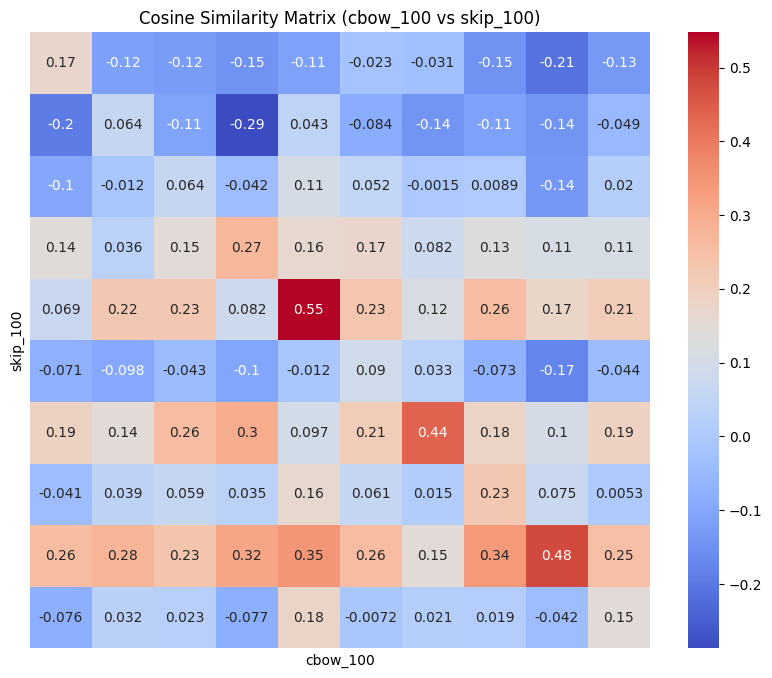

In [45]:


# Compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(data['cbow_100'][3000:3010].tolist(), data['skip_100'][3000:3010].tolist())

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('cbow_100')
plt.ylabel('skip_100')
plt.show()


We can see that there is rarely any high cosine similarity based correlation between the two.


Let us try to experiment for other vector sizes

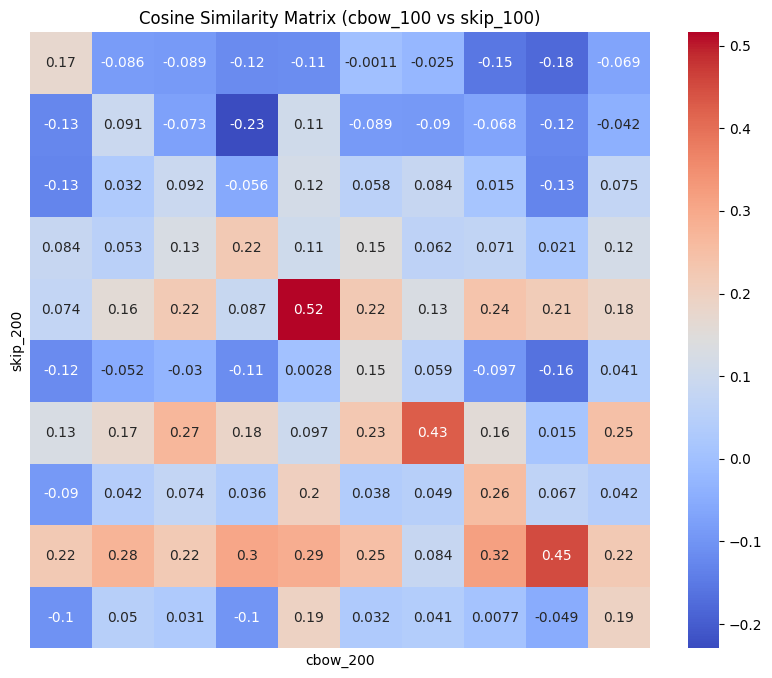

In [49]:

cos_sim_matrix = cosine_similarity(data['cbow_200'][3000:3010].tolist(), data['skip_200'][3000:3010].tolist())


plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('cbow_200')
plt.ylabel('skip_200')
plt.show()

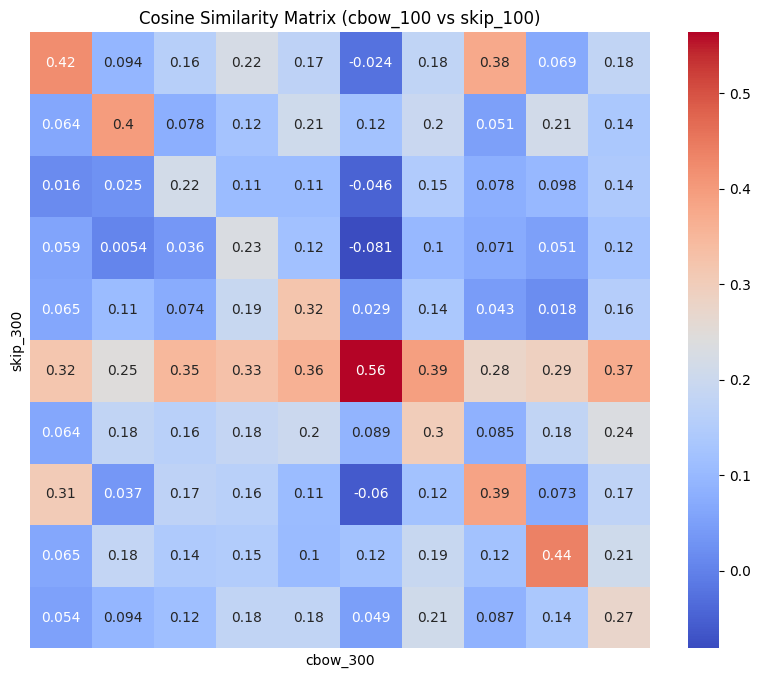

In [50]:
# Compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(data['cbow_300'][3010:3020].tolist(), data['skip_300'][3010:3020].tolist())

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('cbow_300')
plt.ylabel('skip_300')
plt.show()

Again, we see low correlation between cbow and skipgram!

Let us check for correlation between cbow and fasttext

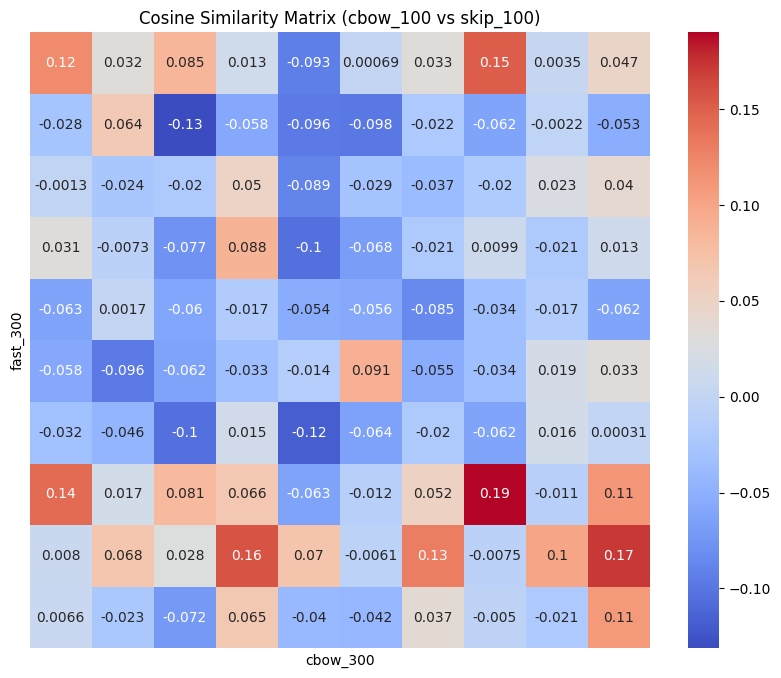

In [53]:
# Compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(data['cbow_300'][3010:3020].tolist(), data['fast_300'][3010:3020].tolist())

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('cbow_300')
plt.ylabel('fast_300')
plt.show()

Similarly, we see low correlation between cbow and fasttext


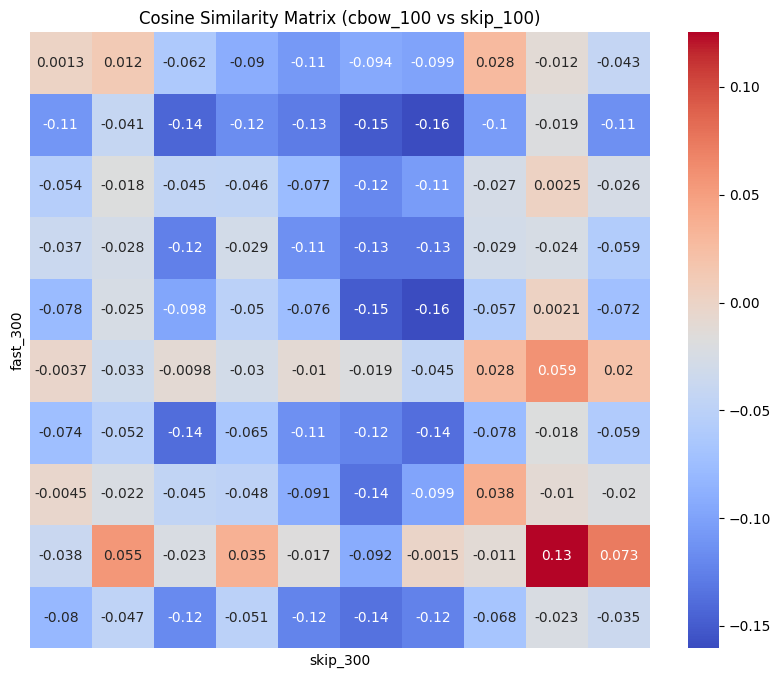

In [52]:
# Compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(data['skip_300'][3010:3020].tolist(), data['fast_300'][3010:3020].tolist())

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Matrix (cbow_100 vs skip_100)')
plt.xlabel('skip_300')
plt.ylabel('fast_300')
plt.show()

Both cbow and skipgram (Word2Vec) have poor correlation with fasttext. In fact it's worse than what the correlation was between cbow and skipgram themselves